In [19]:
%run -t numeric_mapping.py
data.head()

Hello World
Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   T Stage                 4024 non-null   int64
 2   N Stage                 4024 non-null   int64
 3   6th Stage               4024 non-null   int64
 4   differentiate           4024 non-null   int64
 5   Grade                   4024 non-null   int64
 6   A Stage                 4024 non-null   int64
 7   Tumor Size              4024 non-null   int64
 8   Estrogen Status         4024 non-null   int64
 9   Progesterone Status    

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status,percent regional node positive
0,68,1,1,4,1,3,0,4,1,1,60,1,0.041667
1,50,2,2,7,2,2,0,35,1,1,62,1,0.357143
2,58,3,3,9,2,2,0,63,1,1,75,1,0.500000
3,58,1,1,4,1,3,0,18,1,1,84,1,0.500000
4,47,2,1,5,1,3,0,41,1,1,50,1,0.333333


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4024 non-null   int64  
 1   T Stage                         4024 non-null   int64  
 2   N Stage                         4024 non-null   int64  
 3   6th Stage                       4024 non-null   int64  
 4   differentiate                   4024 non-null   int64  
 5   Grade                           4024 non-null   int64  
 6   A Stage                         4024 non-null   int64  
 7   Tumor Size                      4024 non-null   int64  
 8   Estrogen Status                 4024 non-null   int64  
 9   Progesterone Status             4024 non-null   int64  
 10  Survival Months                 4024 non-null   int64  
 11  Status                          4024 non-null   int64  
 12  percent regional node positive  40

In [21]:
#2 - Random Forest but regressive model. This might be better as we will be given an average umber rather than an estimated range.
#I would expect this to be less accurate as in right less often, but the mean squared error should be smaller.

#Regressor, most of the data

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

#Input parameters = everything except survival months and status
data = remove_outliers_tumor_size(data)


x = data.drop(["Tumor Size" ], axis=1)
y = data["Tumor Size"]

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)
# Use RandomForestRegressor for regression tasks

rf = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=5).fit(x_train, y_train)

# Making predictions based on the model
y_pred = rf.predict(x_test)
y_val_pred = rf.predict(x_val)


#Checking accuracy on validation set
mse_validation = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_validation,"(((", str(mse_validation**0.5) + "))")

y_test_pred = rf.predict(x_test)
#Checking accuracy on test set
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set:", str(mse_test) + " ((" + str(mse_test**0.5) + "))")

# Getting feature importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': rf.feature_importances_})

# Sorting features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print("Feature Importances:")
print(feature_importances)

#Before removing race and marital status: 413.27
#After removing race and marital status: 413.27
#After removing status: 548.0517. Worse, but in our case all future participants are alive, so this is not a good metric to use.
#After including validation set: 531.53
#removed regional nodes positive: V:541.67, T: 557.12
#After removing all features with importance less than 0.05: V: 607.887, T: 593.28. 
#Changing number of regressors from 100 to 1000: V: 589.54, T: 598.35
#Max tree depth of 2: V: 509.7, T: 529.26
#Max tree depth of 5: V: 503.4, T: 532.89
#Added all features except status and survival months: V: 481.84, T: 516.78

#After removing outliers form survival months: V: 427.274, T: 406.446
#The above but extreme: !.5 is now .1: V:150.15, T:128.15, don't think this is feasable as almost half the data is removed.



Mean Squared Error on Validation Set: 132.4474674510476 ((( 11.508582338891598))
Mean Squared Error on Test Set: 118.54205499147692 ((10.887702006919408))
Feature Importances:
                           Feature  Importance
1                          T Stage    0.936279
11  percent regional node positive    0.019349
9                  Survival Months    0.013883
0                              Age    0.013307
2                          N Stage    0.006844
8              Progesterone Status    0.002631
5                            Grade    0.001983
4                    differentiate    0.001908
6                          A Stage    0.001286
3                        6th Stage    0.001000
7                  Estrogen Status    0.000976
10                          Status    0.000554


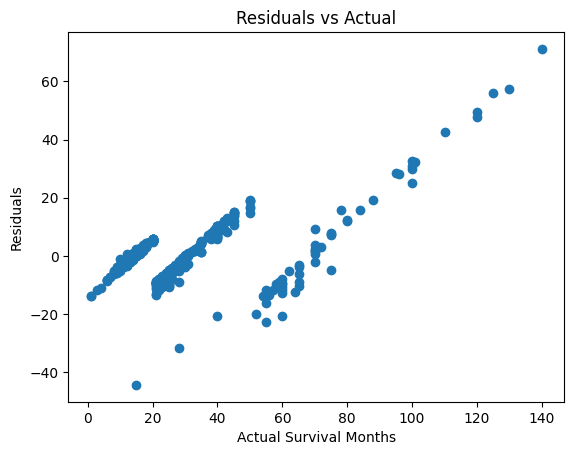

In [22]:
import matplotlib.pyplot as plt
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Survival Months')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')
plt.show()

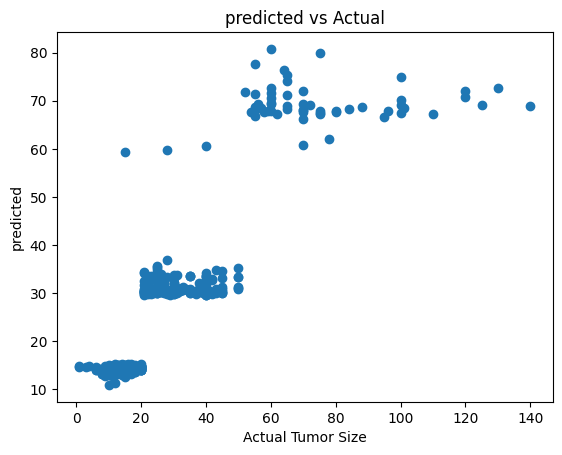

In [23]:
import matplotlib.pyplot as plt
predicted = y_test_pred
min_size = min(len(y_test), len(y_test_pred))
y_test = y_test[:min_size]
y_test_pred = y_test_pred[:min_size]
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Tumor Size')
plt.ylabel('predicted')
plt.title('predicted vs Actual')
plt.show()

In [24]:
#Classifier with bins of 6 month size


from sklearn.calibration import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
np.random.seed(42)

data = remove_outliers_tumor_size(data)


data_grouped = data.copy()
data_grouped['Survival Months Group'] = pd.cut(data_grouped['Survival Months'], bins=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, np.inf])

label_encoder = LabelEncoder()
data_grouped['Survival Months Group'] = label_encoder.fit_transform(data_grouped['Survival Months Group'])

x = data_grouped.drop(["Survival Months", "Status", "Survival Months Group"], axis=1)
y = data_grouped["Survival Months Group"]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_val_pred = rf.predict(x_val)


# Checking the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test only:", accuracy_test)

accuracy_validation = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation only:", accuracy_validation)
#Before removing race and maritial status: 0.0211
#After removing race and marital status: 0.0224
#After removing status: 0.01129. Worse, but in our case all future participants are alive, so this is not a good metric to use.
#After including validation set: V: .893, T: .91066
#removed regional nodes positive: V: .9154, T: .9057
#After removing outliers in survival months: V: 0.933, T: 0.902

#The above but extreme:1.5 is now .1: V:1, T:.993, don't think this is feasable as almost half the data is removed.


Accuracy on test only: 0.1268882175226586
Accuracy on validation only: 0.1268882175226586


In [25]:
#Classifier with bins of 3 month size

from sklearn.calibration import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
np.random.seed(42)


label_encoder = LabelEncoder()
data_grouped['Survival Months Group'] = pd.cut(data_grouped['Survival Months'], bins=[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90, np.inf])
data_grouped['Survival Months Group'] = label_encoder.fit_transform(data_grouped['Survival Months Group'])


x = data_grouped.drop(["Survival Months", "Status", "Survival Months Group"], axis=1)


y = data_grouped["Survival Months Group"]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_val_pred = rf.predict(x_val)


# Checking the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test only:", accuracy_test)

accuracy_validation = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation only:", accuracy_validation)
#Before removing race and maritial status: 0.0211
#After removing race and marital status: 0.0224
#After removing status: 0.01129. Worse, but in our case all future participants are alive, so this is not a good metric to use.
#After including validation set: V: .893, T: .91066
#removed regional nodes positive: V: .9154, T: .9057


#After switching to 3 month bins: V: .8159, T: .8437
#After removing outliers in survival months: V: 0.8695, T: 0.8433
#The above but extreme: !.5 is now .1: V:1, T:1, don't think this is feasable as almost half the data is removed.


Accuracy on test only: 0.11782477341389729
Accuracy on validation only: 0.1268882175226586


In [26]:
#chances of being dead
#Classifier with bins of 3 month size

from sklearn.calibration import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
np.random.seed(42)



x = data_grouped.drop(["Survival Months", "Status"], axis=1)


y = data_grouped["Status"]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.8, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_val_pred = rf.predict(x_val)


# Checking the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test only:", accuracy_test)

accuracy_validation = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation only:", accuracy_validation)
#Before removing race and maritial status: 0.0211
#After removing race and marital status: 0.0224
#After removing status: 0.01129. Worse, but in our case all future participants are alive, so this is not a good metric to use.
#After including validation set: V: .893, T: .91066
#removed regional nodes positive: V: .9154, T: .9057


#After switching to 3 month bins: V: .8159, T: .8437
#After removing outliers in survival months: V: 0.8695, T: 0.8433
#The above but extreme: !.5 is now .1: V:1, T:1, don't think this is feasable as almost half the data is removed.


Accuracy on test only: 0.9003021148036254
Accuracy on validation only: 0.899546827794562


In [27]:
x = data.drop("Survival Months", axis=1)
y = data["Survival Months"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)

# Making predictions based on model
y_pred = rf.predict(x_test)

# Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.019637462235649546
